In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.cluster import SpectralClustering

from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

from sklearn.cluster import KMeans

Import data and split into training/validation datasets.

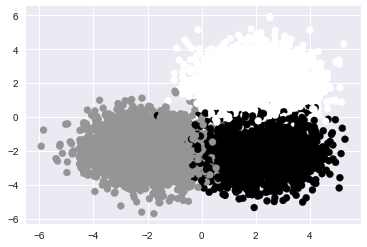

In [2]:
centers = [[2, 2], [-2, -2], [2, -2]]

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

# Mean-Shift Clustering

The estimate_bandwidth function automatically derives a bandwidth based on an inspection of the distances among points in the data. The labels function extracts cluster assignments for each data point, and n_clusters counts how many clusters there are.

In [3]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


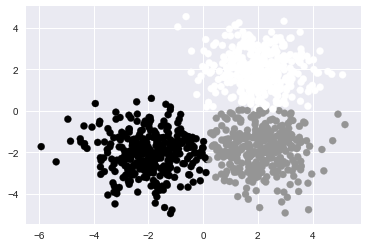

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

# Spectral Clustering

For spectral clustering, we must define that we are looking for 3 clusters.

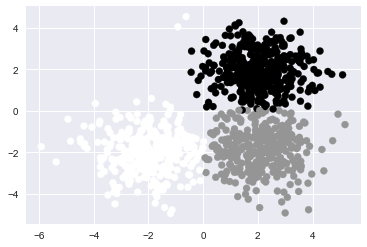

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        2   10  350
1      310    9    1
2        6  305    7


In [5]:
n_clusters=3
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict=sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

# Affinity Propagation

In [6]:
af = AffinityPropagation().fit(X_train)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


Cycle through each cluster and graph them with a center point for the exemplar and lines from the exemplar to each data point in the cluster.

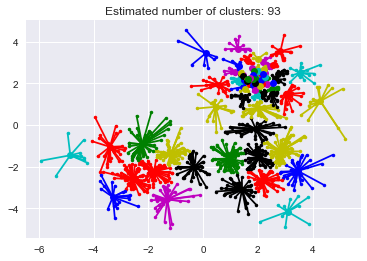

In [7]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configurations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

First, I will use 2 clusters, further apart, and with very small standard deviations.

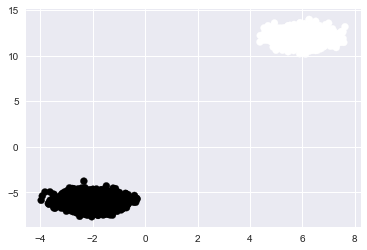

In [8]:
centers1 = [[6, 12], [-2, -6]]

X1, y1 = make_blobs(
    n_samples=8000,
    centers=centers1,
    cluster_std=.5,
    n_features=2,
    random_state=42)

plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.show()

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.9,
    random_state=42)

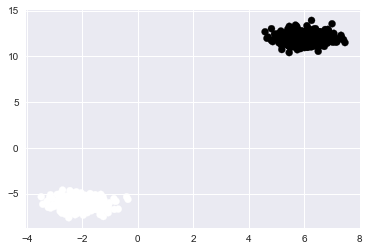

Training Accuracy:
col_0    0    1
row_0          
0        0  425
1      375    0
Testing Accuracy:
col_0     0     1
row_0            
0      3575     0
1         0  3625


In [42]:
def k_means(X_train, y_train, X_test, y_test, n_clus):

    kms = KMeans(n_clusters=n_clus, random_state=42)
    kms.fit(X_train)
    
    train_predict = kms.fit_predict(X_train)
    test_predict = kms.fit_predict(X_test)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=train_predict)
    plt.show()
    
    print('Training Accuracy:')
    print(pd.crosstab(y_train,train_predict))
    print('Testing Accuracy:')
    print(pd.crosstab(y_test,test_predict))
    
k_means(X1_train, y1_train, X1_test, y1_test, 2)

Wow! Using normal K-means clustering, both training and testing accuracy are perfect. For the training data, the model accurately predicts the cluster 0% of the time, which is fine. It is interesting that the case is reversed in the testing data. With K-meas, we must specify the number of clusters we are looking for ahead of time. Let's try mean-shift.<br>

Note: the quantile function for bandwidth affects the type of pairwise distances used, quantile = 0.5 uses the median pair of all pairwise ditances. Setting a lower quantile creates more clusters.

Number of estimated clusters: 2


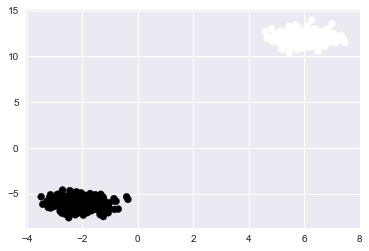

Training Accuracy:
col_0    0    1
row_0          
0      425    0
1        0  375
Testing Accuracy:
col_0     0     1
row_0            
0         0  3575
1      3625     0


In [82]:
def mean_shift(X_train, y_train, X_test, y_test):
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()
    
    test_predict = ms.fit_predict(X_test)

    print('Training Accuracy:')
    print(pd.crosstab(y_train,labels))
    print('Testing Accuracy:')
    print(pd.crosstab(y_test,test_predict))
    
mean_shift(X1_train, y1_train, X1_test, y1_test)

Mean-shift This estimates the number of clusters for you, as opposed to the user having to specify the number of clusters. It also has perfect accuracy for both training and testing, though the clusters are reversed. Let's try spectral clustering.<br>

Note: the default similarity measure is RBF.

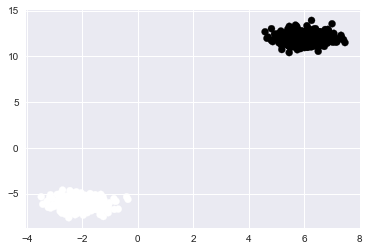

Training Accuracy:
col_0    0    1
row_0          
0        0  425
1      375    0
Testing Accuracy:
col_0     0     1
row_0            
0      3575     0
1         0  3625


In [65]:
def spectral_clustering(X_train, y_train, X_test, y_test, n_clus):

    sc = SpectralClustering(n_clusters=n_clus, random_state=42)
    sc.fit(X_train)
    
    train_predict = sc.fit_predict(X_train)
    
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=train_predict)
    plt.show()

    test_predict = sc.fit_predict(X_test)
    
    print('Training Accuracy:')
    print(pd.crosstab(y_train,train_predict))
    print('Testing Accuracy:')
    print(pd.crosstab(y_test, test_predict))
    
spectral_clustering(X1_train, y1_train, X1_test, y1_test, 2)

Spectral clustering (which quantifies similarity between datapoint pairs) misclassified each cluster 100% of the time, which makes it very accurate if you simply switch the clusters. This might be because we set a very small standard deviation, so all points are pretty uniform with eachother and easy to make sense of in a similarity matrix. One potential drawback is that **we have to specify the number of clusters** we are looking for.

Estimated number of clusters: 105


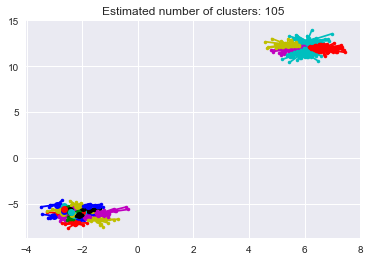

In [21]:
def affinity_prop(X_train, y_train, X_test, y_test):

    af = AffinityPropagation().fit(X_train)

    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

affinity_prop(X1_train, y1_train, X1_test, y1_test)

We can see here that affinity propagation estimated 105 clusters for a very simple 2 clusters. This is not an appropriate choice for this problem, especially because it is computationally expensive. Affinity propagation is better suited for enormous and diverse sets of data with many clusters.<br>

Let's make another set of clusters to play with.

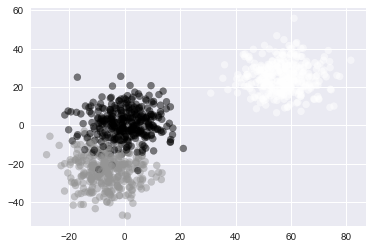

In [60]:
centers2 = [[57, 25], [-7, -24],[0,0]]

X2, y2 = make_blobs(
    n_samples=1000,
    centers=centers2,
    cluster_std=8,
    n_features=2,
    random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, alpha = 0.5)
plt.show()

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    test_size=0.4,
    random_state=42)

These clusters have a much higher standard deviation (2 of them actually bleed into eachother) and have fewer points in the clusters. I expect this will make it harder to classify, since there is less training/validation data and higher variance. The last dataset was trained on 10% and validated on 90%, but because of the smaller size of this dataset, I will train it on 60%.

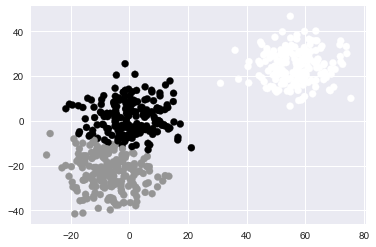

Training Accuracy:
col_0    0    1    2
row_0               
0      193    0    0
1        0  201   12
2        0   13  181
Testing Accuracy:
col_0    0    1    2
row_0               
0      141    0    0
1        0    5  115
2        0  129   10


In [61]:
k_means(X2_train, y2_train, X2_test, y2_test, 3)

At default settings, **conventional k-means** performed pretty well. Out of 544 test points, only 15 were misclassified. This is about a 97.5% accuracy. This dataset was relatively small, so k-means was manageable in terms of computational simplicity.

Number of estimated clusters: 3


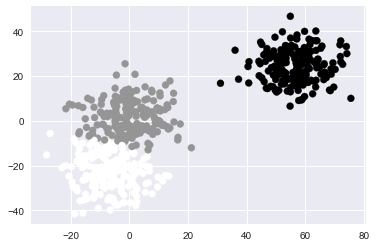

Training Accuracy:
col_0    0    1    2
row_0               
0        0    0  193
1      203   10    0
2       13  181    0
Testing Accuracy:
col_0    0    1    2
row_0               
0        0    0  141
1        3  117    0
2      125   14    0


In [62]:
mean_shift(X2_train, y2_train, X2_test, y2_test)

Using **mean-shift clustering**, we were able to predict the correct number of clusters, misclassifying 17 datapoints. This is ever so slightly worse than conventional k-means, but doesn't require us to know the number of clusters. This could be an advantage, depending on the scenario.

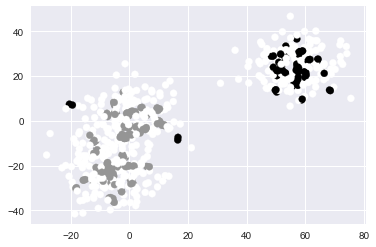

Training Accuracy:
col_0    0   1   2
row_0             
0      122   0  71
1      133  80   0
2      118  72   4
Testing Accuracy:
col_0   0   1  2
row_0           
0      88  49  4
1      76  44  0
2      94  43  2


In [66]:
spectral_clustering(X2_train, y2_train, X2_test, y2_test, 3)

**Spectral clustering** seemed to take much longer than the other 2 methods. This is because of the time it takes to calculate the n x n similarity matrix. It also pretty much got everything wrong! We didn't specify the type of affinity to use, or n_components. We could raise the n_init (Number of time the k-means algorithm will be run with different centroid seeds) but this would make the cell run even longer.

Estimated number of clusters: 18


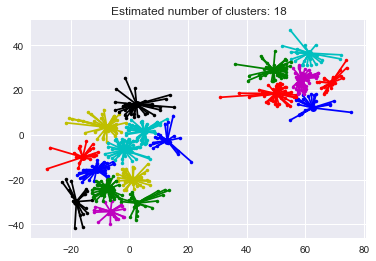

In [67]:
affinity_prop(X2_train, y2_train, X2_test, y2_test)

I find it very interesting that in the previous dataset, with two distinct, uniform, clusters (a relatively easy dataset to classify) the affinity propagation algorithm grossly overestimated the number of clusters (3 to 105) but with this dataset, it only estimated 18 for 3 real clusters. This must be because the clusters had a much higher standard deviation, so the "randomness" of the datapoints lent themselves well to clustering. In the previous dataset, the data was so uniform that even the smallest deviation could warrant making a new cluster. Still, this algorithm is too complex for this dataset so I wouldn't choose to use this in real life.<br>

Time to make our last dataset!

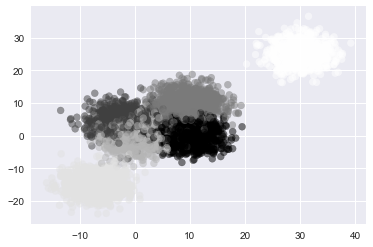

In [84]:
centers3 = [[30, 25],[-7, -15],[0,0],[10,10],[-2,4],[10,0]]

X3, y3 = make_blobs(
    n_samples=5000,
    centers=centers3,
    cluster_std=3,
    n_features=2,
    random_state=42)

plt.scatter(X3[:, 0], X3[:, 1], c=y3, alpha = 0.5)
plt.show()

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size=0.4,
    random_state=42)

This dataset has 6 clusters, 4 of which are very closely intertwined. One more is straggling nearby, and the last one is clearly off in its own space. It will be interesting to see if these methods can distinguish between these clusters.

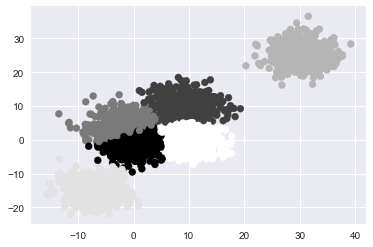

Training Accuracy:
col_0    0    1    2    3    4    5
row_0                              
0        0    0  510    0    0    0
1        0  496    0    0    0    4
2       21    4    0  124    3  359
3       26    0    0    1  465    0
4        7    0    0  369   13   93
5      466    0    0    2   12   25
Testing Accuracy:
col_0    0    1    2    3    4    5
row_0                              
0        0  324    0    0    0    0
1        0    0  333    0    0    1
2       55    0    2    0    8  257
3        0    0    0  322   18    1
4      246    0    0    3    1  101
5        0    0    0   12  298   18


In [85]:
k_means(X3_train, y3_train, X3_test, y3_test, 6)

Without titrating the parameters accordingly, K-means misclassifed some of the points, but did alright overall. Clusters 2 and 4 had the worst accuracy. Cluster 0 was perfect, and cluster 1 was nearly perfect. This could be improved by raising the max_iter (default = 300).

Number of estimated clusters: 3


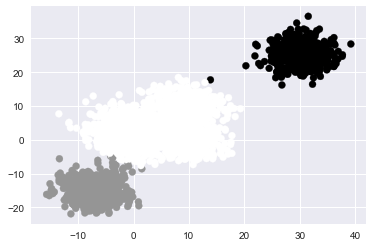

Training Accuracy:
col_0    0    1    2
row_0               
0        0    0  510
1        1  499    0
2      499   12    0
3      491    0    1
4      482    0    0
5      505    0    0
Testing Accuracy:
col_0    0    1    2
row_0               
0        0    0  324
1        1  333    0
2      317    5    0
3      340    0    1
4      348    3    0
5      328    0    0


In [86]:
mean_shift(X3_train, y3_train, X3_test, y3_test)

Despite the quantile being set pretty low, the **mean shift algorithm** estimated too few clusters. I am just using the default settings here in the interest of time, but ways that I could fix this include altering the quantile. This would change the way the bandwidth is estimated, we would want a smaller bandwidth for a rougher surface, allowing for more clusters. We could also increase n_jobs, the number of jobs used in the computation.

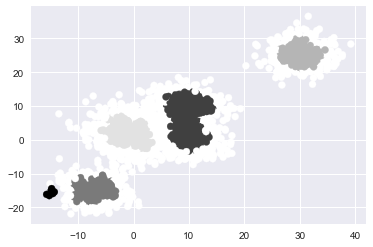

Training Accuracy:
col_0    0    1    2    3    4  5
row_0                            
0      174    0  336    0    0  0
1      164    0    0  329    0  7
2      185  321    0    0    5  0
3      130    0    0    0  362  0
4      180  300    0    0    2  0
5      200    5    0    0  300  0
Testing Accuracy:
col_0    0    1    2    3    4    5
row_0                              
0      117    0    0  207    0    0
1      142  192    0    0    0    0
2       95    0    1    0    0  226
3      130    0    5    0  206    0
4      134    0    0    0    0  217
5      159    0  161    0    2    6


In [88]:
spectral_clustering(X3_train, y3_train, X3_test, y3_test, 6)

This result is very interesting -- with **spectral clustering**, 5 clusters are defined within the interior of one massive, varied, and far-reaching cluster. The various centroids of each cluster and their immediate surroundings are classified as separate from the outskirts. All clusters have a high degree of error. To address this, we could try altering the quantile or eigenvalue decomposition strategy, increase the n_init (number of times the algorithm is run with different centroid seeds), and tinkering with the gamma kernel coefficient.

Estimated number of clusters: 666


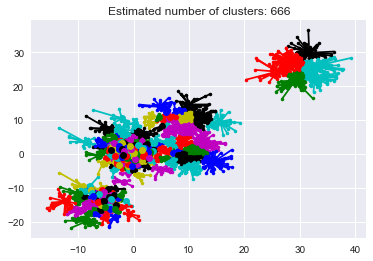

In [89]:
affinity_prop(X3_train, y3_train, X3_test, y3_test)

Yet again, **affinity propagation** has shown itself to be too complicated for the likes of this problem. It is however, interesting to note that the most easily defined cluster (far off to the right) was only split up into 4 decently sized clusters, whereas the clusters that are running into eachother were split up into hundreds of micro-clusters. with a relatively high variance and so much overlapping data, this is unsurprising.

# Conclusion

Overall, we see that k-means has performed very strongly with these fairly simple clustering tasks. K-means is versatile with many tunable parameters, and is quite useful when the number of clusters is known. Mean-shift showed similar results as k-means, miss distinctions between clusters and oversimplify the data. Mean-shift is comparable but is more often used when the number of desired clusters is not known. Spectral clustering tended to complicate the clusters, splitting clusters up into inner/outer clusters, and generally missing the mark. This technique should be used when the number of clusters are known, and perhaps when the task at hand is relatively complex, as it tends to complicate the simpler clusters. Affinity propagation should be reserved for extremely complex tasks where the number of clusters is not known.